# Prática 6 
## Analise dos dados
### Tarefa 4

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
from LabIFSC import M

R = 98.7 #ohm, escala de 200 ohm
C = 108.8e-9 #F, escala de 200 nF
L = 45.3e-3 #H, escala de 200 mH
erro_R = 0.5+0.8e-2*98.7
erro_C = 2e-9+ 2.5e-2*abs(108.8e-9)
erro_L = 3e-3+ 2.5e-2*abs(45.3e-3)
f = 1/(2*np.pi*np.sqrt(L*C))

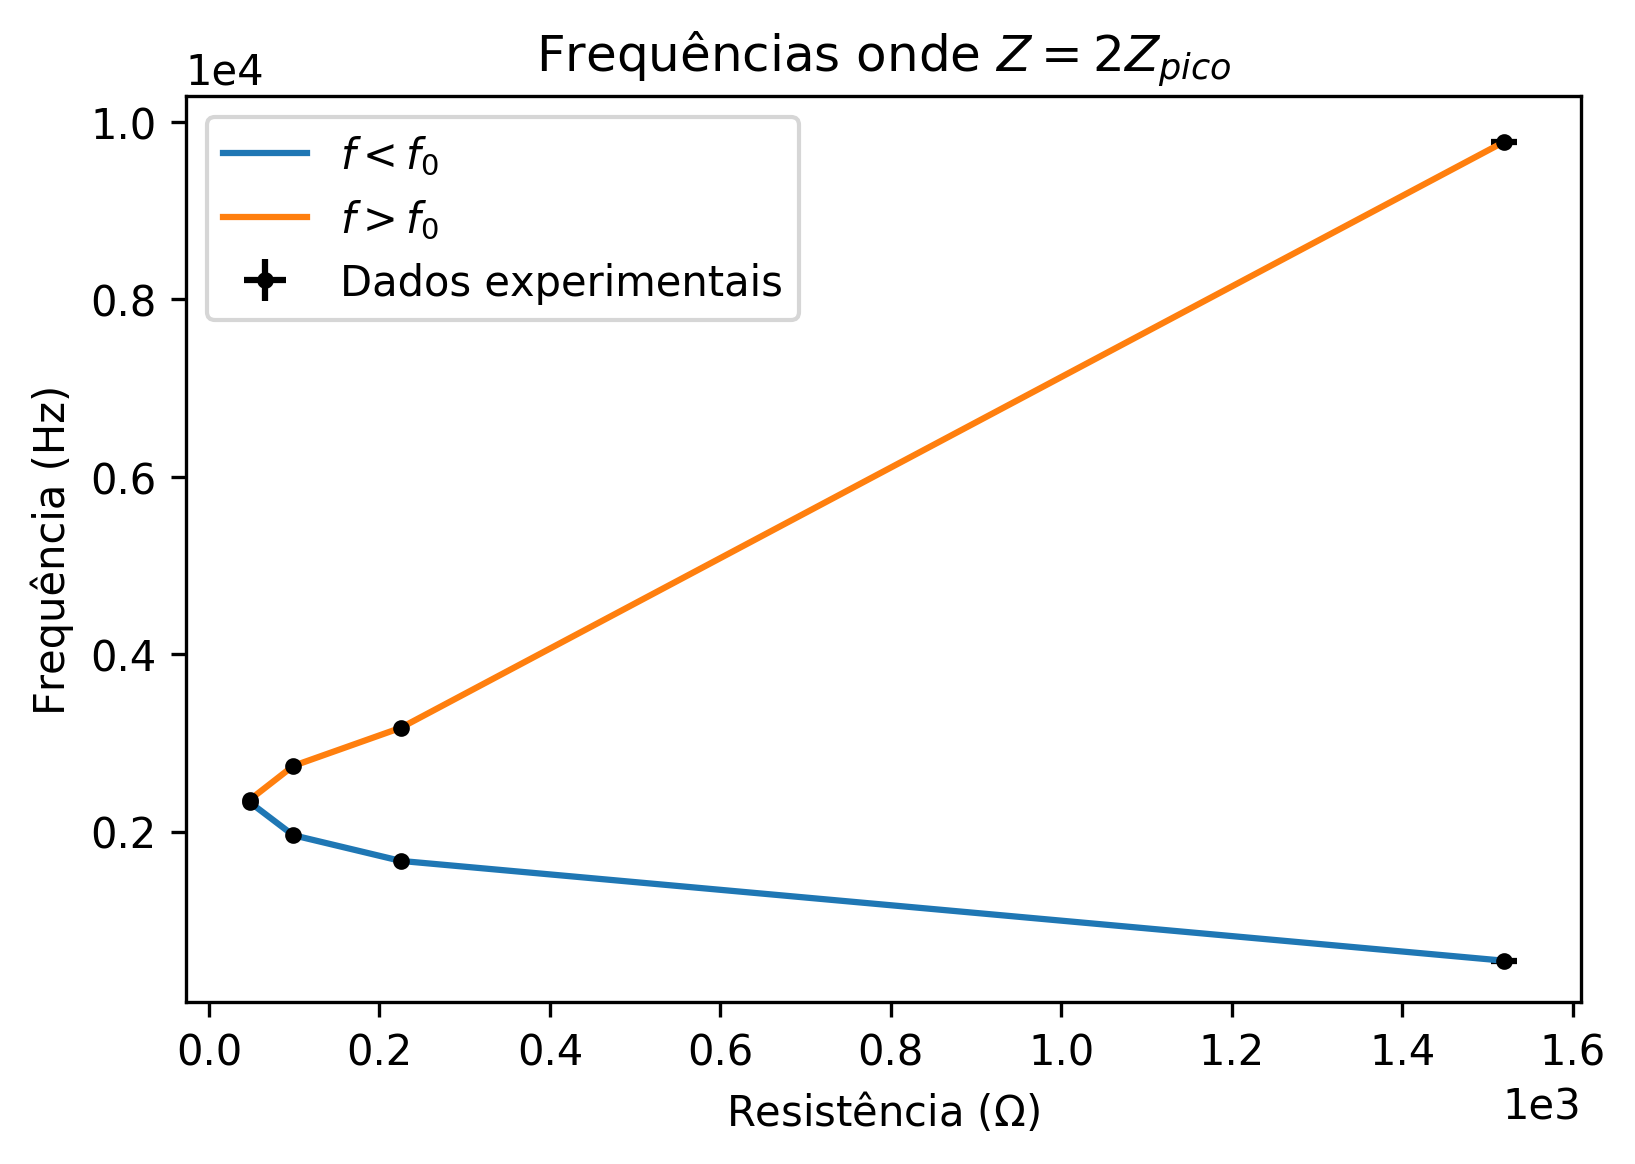

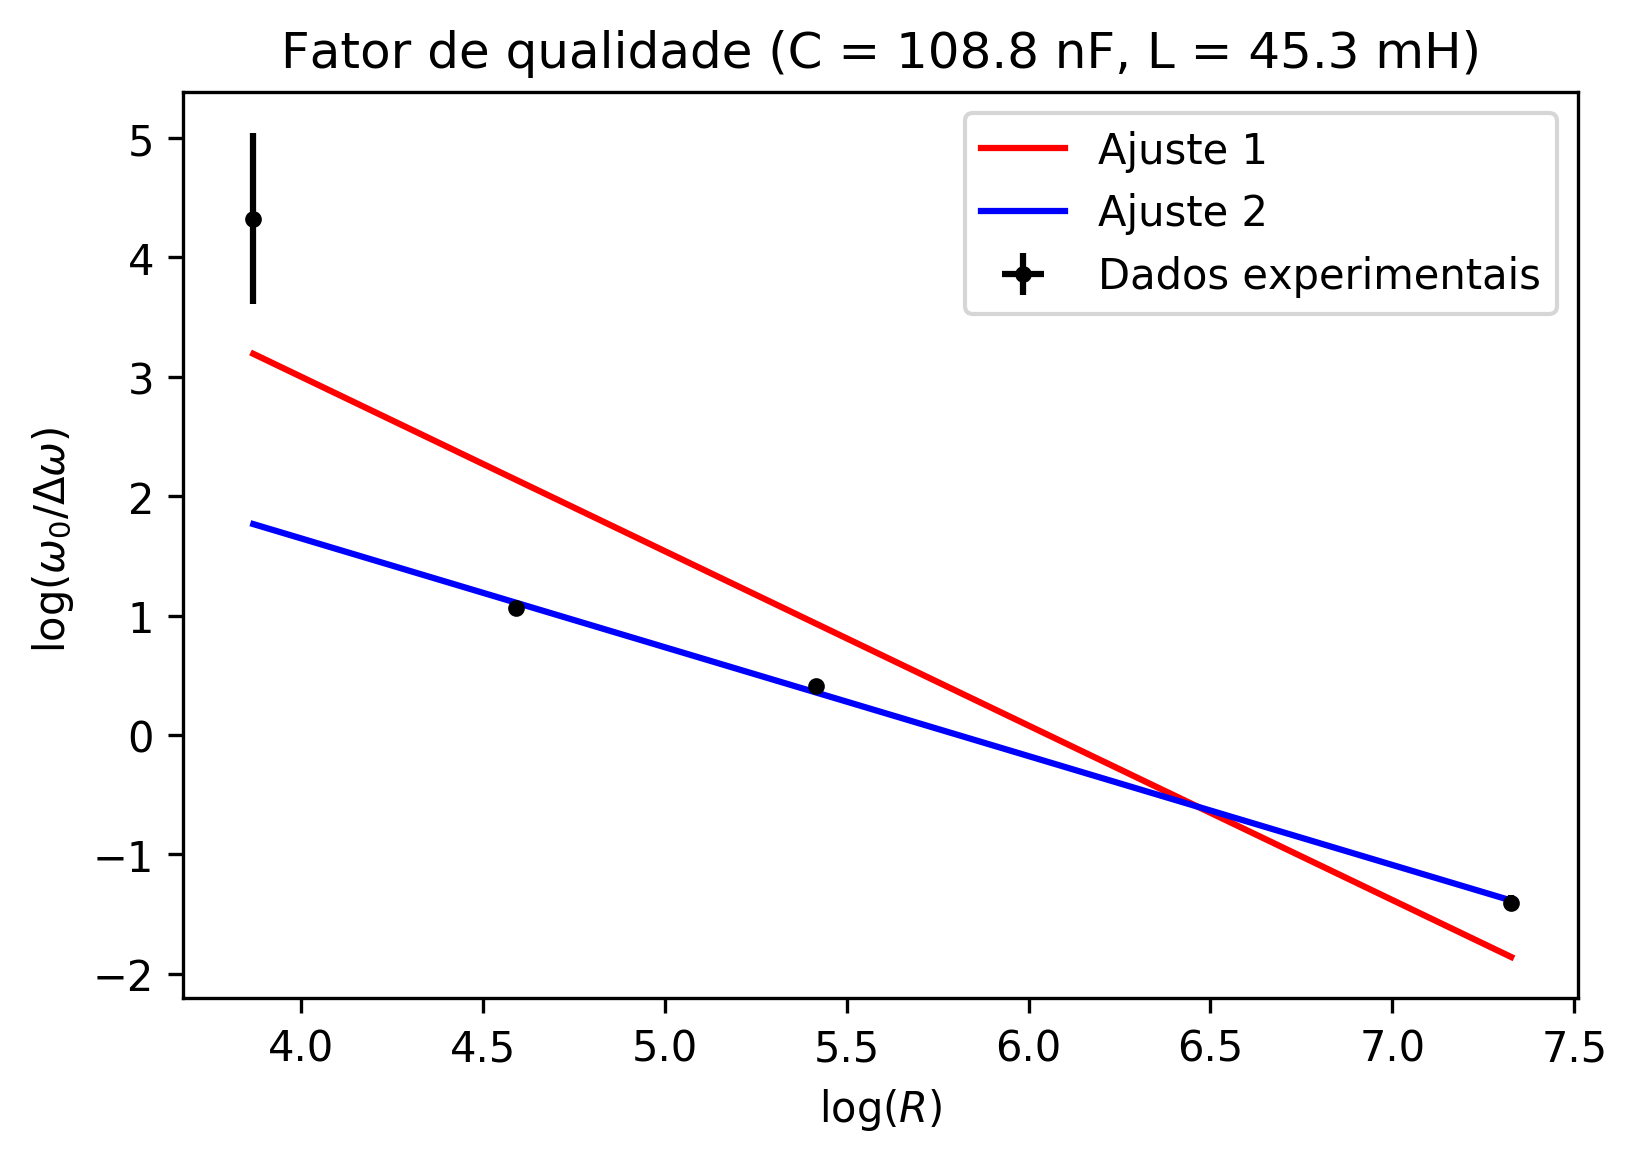

In [11]:
L5 = L
C5 = C
data5 = np.loadtxt('data/tarefa5.dat').T
R5 = data5[0]

erro_R5 = 0.5+0.8e-2*abs(R5)
erro_R5[-1] = 3+ 0.8e-2*abs(R5[-1])
erro_R5x = erro_R5
erro_R5 = erro_R5/R5 # erro do log

escV0,quadV0 = data5[1],data5[2]
escVr,quadVr = data5[3],data5[4]
f1,f2 = data5[5],data5[6]
V0 = escV0*quadV0
Vr = escVr*quadVr
I5 = Vr/R5
Z5 = V0/I5

erro_f1 = f1*0.005
erro_f2 = f2*0.005

dw = (f2-f1)*2*np.pi
w0 = 1/np.sqrt(L5*C5)
Q = w0/dw
erro_w0 = -1/2*(L5*C5)**(-3/2)*(erro_C*L+erro_L*C)
erro_dw = 2*np.pi*(f2+f1)*0.005
erro_Q = (w0*erro_dw+dw*erro_w0)/(dw**2)
erro_Q = (w0*erro_dw+dw*erro_w0)/(dw**2)/Q # erro do log
slope_5, intercept_5,aosk,oaskd,ogim = stats.linregress(np.log(R5), np.log(Q))
slope_51, intercept_51,aosk1,oaskd1,ogim1 = stats.linregress(np.log(R5)[1:],np.log(Q)[1:])

plt.figure(dpi=300)
plt.title('Frequências onde $Z = 2 Z_{pico}$')
plt.xlabel('Resistência ($\\Omega$)')
plt.ticklabel_format(style="sci", axis="both", scilimits=(0,0))
plt.ylabel('Frequência (Hz)')
plt.errorbar(R5, f1, yerr=erro_f1, xerr=erro_R5x, fmt='.', color="black", label="Dados experimentais")
plt.errorbar(R5, f2, yerr=erro_f2, xerr=erro_R5x, fmt='.', color="black")

plt.plot(R5,f1,'-',label=r'$f<f_0$')
plt.plot(R5,f2,'-',label=r'$f>f_0$')
plt.legend()
# plt.show()
plt.savefig('tarefa5-freq.png',bbox_inches='tight')

plt.figure(dpi=300)
# plt.subplot(1,2,1)
plt.title('Fator de qualidade (C = 108.8 nF, L = 45.3 mH)')
plt.plot(np.log(R5), slope_5*np.log(R5)+intercept_5, color="red", label="Ajuste 1")
plt.plot(np.log(R5), slope_51*np.log(R5)+intercept_51, color="blue", label="Ajuste 2")
plt.errorbar(np.log(R5),np.log(Q),xerr=erro_R5,yerr=erro_Q, fmt='.', color="black", label="Dados experimentais")
plt.ylabel(r' $\log(\omega_0/\Delta\omega)$')
plt.xlabel('$\log(R)$')
plt.legend(loc=0)

# plt.subplot(1,2,2)
# plt.errorbar(R5,Q,xerr=erro_R5*R5,yerr=erro_Q*Q, fmt='.', color="black", label="Dados experimentais")
# plt.ylabel(r' $\omega_0/\Delta\omega$')
# plt.xlabel(r'Resistência R ($\Omega$)')
# plt.legend(loc=0)



# plt.show()
plt.savefig('tarefa5-loglog-q-r.png',bbox_inches='tight')

### Conclusão da tarefa 5
> A princípio parece haver um ponto fora do esperado, tenho que analisar melhor